## Simulated Annealing on the Traveling Salesman problem##

 States: A full path represented as a list for the order of cities to travel. For example, [0,1,0] says "Go from city 0 to city 1 to city 0".

In [72]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

def SA_TS(dist_mat, T, start_city, mean, sigma):

    # Total distance for current path
    def objective_function(dist_mat, state):
        cost = 0
        for i in range(len(state) - 2):
            cost += dist_mat[state[i], state[i+1]]
        cost += dist_mat[state[-1],state[-2]]
        return cost
    
    def switch_two_cities(state):
        a = random.randint(1, len(state)-2)
        b = random.randint(1, len(state)-2)
        while b == a:
            b = random.randint(1, len(state)-2)
        state[a], state[b] = state[b], state[a]
        return state
               
    # Initial path: 0 -> 1, 1 -> 2, ... N-1 -> N
    initial = [i for i in range(len(dist_mat))]
    initial.remove(start_city)
    initial.insert(0,start_city)
    initial.append(start_city)
    distance_array = []
    
    path = initial 
    current_distance = objective_function(dist_mat, path)
    best_distance = current_distance
    best_path = initial
    
    for t in range(T,1,-1):
        
        distance_array.append(current_distance)
        new_path = switch_two_cities(path)
        
        new_distance = objective_function(dist_mat, new_path)
        E = current_distance - new_distance
                
        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path
        
        # new path is shorter
        if E > 0:
            current_distance = new_distance
            path = new_path
            
        else:
            
            temp = (t+1)/T        
            Z = (E-mean)/sigma
            p = np.exp(Z/temp)

            if np.random.binomial(1, p) == 1:
                current_distance = new_distance
                path = new_path
        
    plt.plot(distance_array)
    plt.title('Search path (by objective function)')
    plt.ylabel('Path distance')
    plt.xlabel('Temperature (iteration)')
    plt.show()
    
    return best_path, best_distance

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7980.0,17690.0,1660.0,1250.0,3470.0,5640.0,7180.0,12690.0,780.0,3870.0,2800.0,17150.0,6560.0
1,790.0,22540.0,2770.0,1780.0,19730.0,970.0,1040.0,17480.0,3480.0,10680.0,14960.0,1520.0,5290.0
2,7400.0,6560.0,50.0,8330.0,15940.0,9280.0,1550.0,560.0,10490.0,4290.0,1530.0,11470.0,7430.0
3,490.0,8650.0,7420.0,18130.0,0.0,12000.0,19440.0,10270.0,18060.0,14720.0,1400.0,1700.0,15870.0
4,3320.0,12980.0,2480.0,1380.0,10340.0,5830.0,2510.0,11460.0,3510.0,5620.0,12400.0,13590.0,690.0
5,2960.0,9320.0,9200.0,3550.0,20870.0,14320.0,9270.0,8810.0,3880.0,9250.0,3940.0,14920.0,15220.0
6,8360.0,1150.0,11690.0,9870.0,3850.0,12950.0,7680.0,6340.0,1050.0,5880.0,4740.0,3220.0,4110.0
7,1760.0,8270.0,17760.0,19340.0,3580.0,10570.0,6540.0,6040.0,12260.0,12020.0,3730.0,1800.0,12100.0
8,10660.0,6840.0,10940.0,1580.0,18100.0,9960.0,6460.0,7500.0,1690.0,2220.0,6890.0,3790.0,16560.0
9,18140.0,1120.0,970.0,9890.0,12920.0,220.0,580.0,4060.0,480.0,3280.0,1170.0,14670.0,350.0


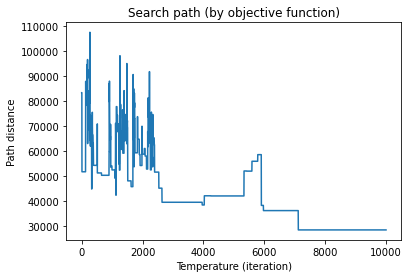

([0, 7, 2, 6, 8, 10, 9, 1, 11, 3, 12, 4, 5, 0], 28630.0)

In [73]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = round(distance,-1)
    return distance_matrix

T = 10000
mean = 100
sigma = 10000
distance_matrix = pd.DataFrame(write_distance_matrix(13, mean, sigma))
display(distance_matrix)

SA_TS(distance_matrix.to_numpy(), T, start_city = 0, mean = sigma, sigma = sigma)

In [67]:
a = [1,2,3,4]
a.insert(0,5)
a

[5, 1, 2, 3, 4]